# CHEM 10 - Lab 2: Colligative Properties: Freezing Point Depression

In this lab you will determine the freezing point depression due to a known solute (p-dichlorobenzene) in cyclohexane, then will again use freezing point depression, this time to determine the molar mass of an unknown solute. There is a fair bit of math in this lab, as well as determining multiple best fit lines. This python notebook will help to walk you through the calculations and the plotting. There are lots of small steps in this notebook so that you can try to understand each piece of code. 

To make a plot like in Figure 2-3 in your lab procedure, you will need to use your data to create two different best fit lines. You will have to decide which data points should be included in the line fits (Figure 2.3 uses the first 2 points to generate the first line, whereas the last 4-5 stable points are used for the other; look carefully at your data to determine which should be included in which fit) and put them into separate data files. Two sample text files with data are provided, but you will need to use your own data. You can either paste your data into these files, or make new files and update the code below with the names of the new files. Note: Sometimes the spacing between data points can by a little tricky in python. 

First, load some of the python libraries.  This will help us with some calculations and making plots. 

In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt
from scipy import stats

Next, set up some empty arrays that we will populate with the data you collected that you have put into the text files. 

In [4]:
# Set up empty arrays for the data from the text files
time_1 = []
temperature_1 = []
time_2 = []
temperature_2 = []

Next, read in the data from the text file, 'LAB_2.time_temp_early_dichlorobenzene.txt'. This file should have your first set of values, obtained in the early part of the experiment.  The code is set up to read in data delimited (separated) by spaces, but depending on how you enter your data, you can change this to be tab (\t) or comma delimited. The code below is set up to skip the first one line of text (the header). 

In [5]:
# Read in the data from the txt file, but skip the header on the first line 
# The output of this function is a list of lists; that is, each row is a entry in our list, but each row is itself a list of values. 
early_file = ('LAB_2.time_temp_early_dichlorobenzene.txt')  
values = numpy.genfromtxt(fname=early_file, skip_header=1, delimiter='\t', dtype='unicode')
print(values)


[['0' '13']
 ['20' '0.4']]


Check that the values printed out look correct. Next, we will load these values from the text file into the arrays. Sometimes it is useful to print things out along the way to understand what your code is doing. Feel free to remove the # in the print statements below so that you can see the counter i and the values[i,0] as they are loaded into the array. Keep in mind that you are adding values to an array, so if you re-run the code in this cell, you will just keep adding values. To start from scratch, re-run the empty array code above first. 

In [6]:
for i in range(0, len(values)):
    #print(i)
    #print(values[i,0])
    time_1.append(float(values[i,0])); 
    temperature_1.append(float(values[i,1]));
#print (time_1)
#print (temperature_1)

Let's print everything out to check that it was read into the arrays correctly.

In [7]:
print("Recorded time (sec):", time_1)
print("Recorded temperatures (degrees C):", temperature_1)

Recorded time (sec): [0.0, 20.0]
Recorded temperatures (degrees C): [13.0, 0.4]


Do you have the correct number of values?  Now that we have the x and y values, we can compute the best fit line for this data. This is done with linear regression in the stats package / library, and will generate a slope, intercept, and rvalue from a linear regression fit of the x and y data.

In [9]:
print("\nDetermining best fit line... \n")
# Use linear regression to determine the best fit line
fit_1 = stats.linregress(time_1, temperature_1)
print(f"R-squared: {fit_1.rvalue**2:.6f}")
print(f"Slope: {fit_1.slope:.6e}")
print(f"intercept: {fit_1.intercept:.6e}")
R_1_text = f"R^2 = {fit_1.rvalue**2:.4f}"
eqn_1_text = f"y = {fit_1.slope:.4f} x + {fit_1.intercept:.4f}"


Determining best fit line... 

R-squared: 1.000000
Slope: -6.300000e-01
intercept: 1.300000e+01


Think about these values; should the slope be positive or negative? A negative slope shows that the temperature is decreasing over time. Now we will plot the early time and temperature data, then will add the best fit line. You can change the labels, title, and limits, as well as the style of the plot, below. 

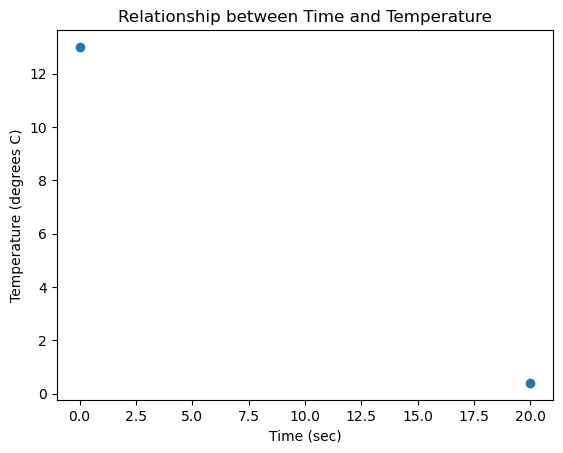

In [10]:
# Plot your data
# Change the text to represent the proper x and y axes values, and change the title
plt.figure()
plt.xlabel('Time (sec)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
plt.plot(time_1, temperature_1, 'o', label='measured data')
#plt.ylim(-10, 180)
#plt.xlim(-300, 110)

Think about your plot - Does it make sense with the values that were in your file? Now we determine the fit values from our equation of the best fit line so that we can add them to the graph. Since we will need to extrapolate our best fit line on the graph to see the intersection point, add a value to create a new time array that has an additional value - let's choose time=50.0 s

In [11]:

# Use slope from the fit to determine the fitted values for the plot
fit_1_temperature = []
time_1_extrapolated = []
time_1_extrapolated = time_1.copy()
time_1_extrapolated.append(50.0)
#extrapolated_temperature = numpy.insert(temperature, 0, extrapolated_zero_temp)
#print(extrapolated_temperature)
for value in time_1_extrapolated:
    temp = fit_1.slope * value + fit_1.intercept
    fit_1_temperature.append(temp)

print("Recorded time (sec):", time_1)
print("Recorded temperatures (degrees C):", temperature_1)
print("Extrapolated time (sec):", time_1_extrapolated)
print("Fit temperatures (degrees C):", fit_1_temperature)   

Recorded time (sec): [0.0, 20.0]
Recorded temperatures (degrees C): [13.0, 0.4]
Extrapolated time (sec): [0.0, 20.0, 50.0]
Fit temperatures (degrees C): [13.0, 0.40000000000000036, -18.5]


Check that you now have one more value for the extrapolation and fit data arrays compared to your recorded arrays. Now we will add this to the plot, and add text for the equation for the best fit line. 

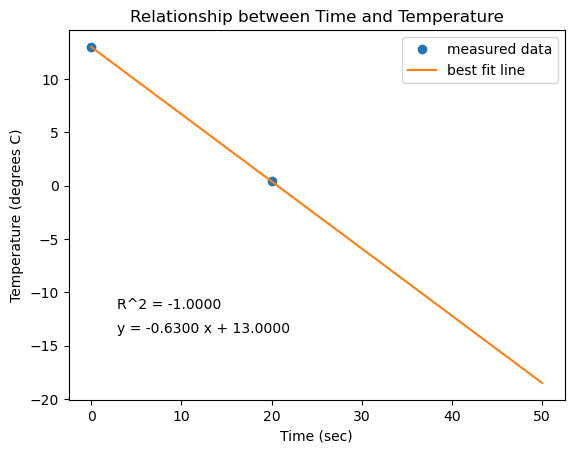

In [12]:

plt.figure()
plt.xlabel('Time (sec)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
plt.plot(time_1, temperature_1, 'o', label='measured data')
#plt.ylim(-10, 180)  # set up the limits for the x and y axes
#plt.xlim(-300, 110)
plt.plot(time_1_extrapolated,fit_1_temperature, '-', label='best fit line')
plt.legend()
#adding text inside the plot
plt.figtext(0.2, 0.25, eqn_1_text)  # Place the equation text where you want it
plt.figtext(0.2, 0.3, R_1_text)
plt.show()
#plt.savefig('LAB_2.ColligativeProperties.png')

Woo! Hopefully this looks like a nice line along with your data points.  Now, the next step is to do it all over again with the second set of data. 

In [13]:
# Read in the data from the txt file, but skip the header on the first line 
# The output of this function is a list of lists; that is, each row is a entry in our list, but each row is itself a list of values. 
late_file = ('LAB_2.time_temp_late_dichlorobenzene.txt')  
values = numpy.genfromtxt(fname=late_file, skip_header=1, delimiter='\t', dtype='unicode')
print(values)


[['120' '-4.1']
 ['140' '-4.1']
 ['160' '-4.0']
 ['180' '-4.0']
 ['200' '-4.0']]


Check that these were read in correctly from your text file.  Next, we will load these values from the text file into the arrays. Feel free to uncomment the print statements to more clearly see how the values are loaded into the arrays. 

In [16]:
# Set up empty arrays for the data from the text files
time_2 = []
temperature_2 = []


# load the values into the arrays
for i in range(0, len(values)):
    #print(i)
    #print(values[i,0])
    time_2.append(float(values[i,0])); 
    temperature_2.append(float(values[i,1]));

#print (time_2)
#print (temperature_2)


Now that we have the x and y values, we can compute the best fit. Just like the previous line, his is done with linear regression in the stats package / library, and will generate a slope, intercept, and rvalue from a linear regression fit.

In [17]:
print("\nDetermining best fit line... \n")
# Use linear regression to determine the best fit line
fit_2 = stats.linregress(time_2, temperature_2)
print(f"R-squared: {fit_2.rvalue**2:.6f}")
print(f"Slope: {fit_2.slope:.6e}")
print(f"intercept: {fit_2.intercept:.6e}")
R_2_text = f"R^2 = {fit_2.rvalue**2:.4f}"
eqn_2_text = f"y = {fit_2.slope:.4f} x + {fit_2.intercept:.4f}"


Determining best fit line... 

R-squared: 0.750000
Slope: 1.500000e-03
intercept: -4.280000e+00


Think about these values. Since the temperature is stable, the line should be close to flat and the slope a very small value. We can now use the slope and intercept to determine the intersection of the lines, but first we will plot the late time and temperature data, then will add the best fit lines. 

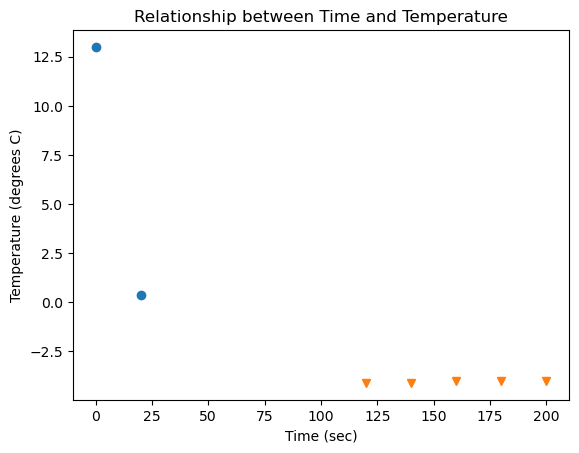

In [155]:
# Plot your data
# Change the text to represent the proper x and y axes values, and change the title
plt.figure()
plt.xlabel('Time (sec)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
plt.plot(time_1, temperature_1, 'o', label='measured early data')
plt.plot(time_2, temperature_2, 'v', label='measured later data')
#plt.ylim(-10, 180)
#plt.xlim(-300, 110)

Look at the data and verify that it makes sense to you.  Next we determine the fit values from our equation of the best fit line so that we can add them to the graph. We need to extrapolate this fit line, so will copy the array and add a value -  let's choose time=25.0 s

In [18]:
# Use slope from the fit to determine the fitted values for the plot
fit_2_temperature = []
time_2_extrapolated = time_2.copy()
time_2_extrapolated.append(25.0)
for value in time_2_extrapolated:
    temp = fit_2.slope * value + fit_2.intercept
    fit_2_temperature.append(temp)

print("Recorded time (sec):", time_2)
print("Recorded temperatures (degrees C):", temperature_2)
print("Extrapolated time (sec):", time_2_extrapolated)
print("Fit temperatures (degrees C):", fit_2_temperature)   

Recorded time (sec): [120.0, 140.0, 160.0, 180.0, 200.0]
Recorded temperatures (degrees C): [-4.1, -4.1, -4.0, -4.0, -4.0]
Extrapolated time (sec): [120.0, 140.0, 160.0, 180.0, 200.0, 25.0]
Fit temperatures (degrees C): [-4.1, -4.07, -4.04, -4.010000000000001, -3.9800000000000004, -4.2425]


Check your data - do you have the same number of values for your extrapolaed and fit arrays? Is it one more value than the recorded data? Next we add both of the best fit lines to the graph, along with the measured data.  

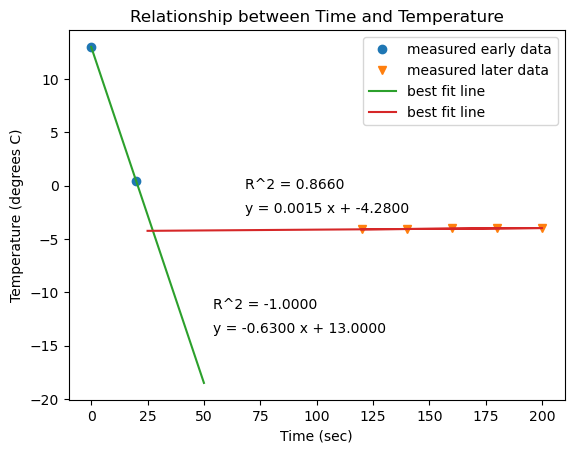

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot your data
# Change the text to represent the proper x and y axes values, and change the title
plt.figure()
plt.xlabel('Time (sec)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
plt.plot(time_1, temperature_1, 'o', label='measured early data')
plt.plot(time_2, temperature_2, 'v', label='measured later data')
#plt.ylim(-10, 180)
#plt.xlim(-300, 110)
plt.plot(time_1_extrapolated,fit_1_temperature, '-', label='best fit line')
plt.plot(time_2_extrapolated,fit_2_temperature, '-', label='best fit line')
plt.legend()
#adding text inside the plot
plt.figtext(0.35, 0.25, eqn_1_text)  # Place the equation text where you want it
plt.figtext(0.35, 0.3, R_1_text)
plt.figtext(0.4, 0.50, eqn_2_text)  # Place the equation text where you want it
plt.figtext(0.4, 0.55, R_2_text)
plt.show()
plt.savefig('LAB_2.ColligativeProperties.png')

Check that your plot looks how you want it to. The plot will be saved as a png file for you to print out for your lab. Do you see the intersection of the best fit lines? This is the freezing point of your solution. To find a precise value, we can use the equations of the best fit line and solve for the intersection point. To find the intersection point $(x,y)$, we use the equation of the two
lines $$(y=m_1*x+b_1, y=m_2*x+b_2)$$ and then solve for the expression for where the y value will be same. Rearrange one of the line equations to solve for x and plug this into the other equation, then solve for y. You should get an expression like the following: 
$$ y = m_1 \bigg(\frac{b_2 - b_1}{m_1 - m_2}\bigg) + b_1$$
Let's implement this equation into python to solve for the freezing temperature of your solution. 

In [20]:
#print(fit_1.slope)
#print(fit_1.intercept)
#print(fit_2.slope)
#print(fit_2.intercept)
y = fit_1.slope * (( fit_2.intercept - fit_1.intercept ) / (fit_1.slope - fit_2.slope)) + fit_1.intercept
print("Extrapolated freezing point:",  y)

Extrapolated freezing point: -4.238954869358672


Check to see that this y value makes sense based on the intersection in your plot. If so, record this value to the correct number of significant figures based on your measured values. You will use this value to determine the freezing point depression constant for cyclohexane, $K_f$. You can then use this same code and modify it for determining the molar mass of your unknown compound. 